In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
df = pd.read_csv('processed-mls.csv')

Wall time: 163 ms


In [3]:
first_length = df.shape[0]

In [4]:
df.head(5)

,Unnamed: 0,eureka_processed_id,eureka_id,neighborhood_id,sold_date,property_type,address,city,state,zip,...,hoamonth,status,next_open_house_start_time,next_open_house_end_time,source,mls,latitude,longitude,action,timestamp_utc
0,0,7956,16997553,64.0,2019-03-06,NaN,1501 Canyonwood Ct,WALNUT CREEK,CA,94595,...,805.0,5,NaN,NaN,NaN,CC40852811,37.857396,-122.069674,I,2019-03-21 03:07:17.508259+00:00
1,1,9340,81736764,1.0,NaN,NaN,80 Lily CT,BRISBANE,CA,94005,...,278.0,1,NaN,NaN,NaN,ML81736764,37.697279,-122.420136,I,2019-03-21 03:07:17.508259+00:00
2,2,9720,16976744,21.0,NaN,NaN,919 39Th Ave,OAKLAND,CA,94601,...,0.0,1,NaN,NaN,NaN,BE40850800,37.771848,-122.221259,I,2019-03-21 03:07:17.508259+00:00
3,3,9875,16978571,NaN,NaN,NaN,2075 Quesada AVE,NaN,CA,94124,...,0.0,8,NaN,NaN,NaN,CRCV19017999,37.737195,-122.398787,I,2019-03-21 03:07:17.508259+00:00
4,4,4012,81735179,46.0,NaN,NaN,600 Moore RD,WOODSIDE,CA,94062,...,0.0,1,NaN,NaN,NaN,ML81735179,37.457449,-122.227054,I,2019-03-21 03:07:17.508259+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27600 entries, 0 to 27599
Data columns (total 28 columns):
Unnamed: 0                    27600 non-null int64
eureka_processed_id           27600 non-null int64
eureka_id                     27600 non-null int64
neighborhood_id               25270 non-null float64
sold_date                     13720 non-null object
property_type                 0 non-null float64
address                       27588 non-null object
city                          27596 non-null object
state                         27600 non-null object
zip                           27600 non-null object
price                         27600 non-null float64
beds                          27600 non-null int64
baths                         27600 non-null float64
square_feet                   27600 non-null int64
lot_size                      27372 non-null float64
year_built                    27600 non-null int64
date_listed                   27600 non-null object
price_square

In [6]:
df_city = df['city'].unique()
df_city.sort
city = pd.DataFrame(df_city)
city.to_excel('city.xlsx')

In [7]:
%pwd

'C:\\Users\\songt\\Desktop\\EUREKA'

In [8]:
df.isna().sum()

Unnamed: 0                        0
eureka_processed_id               0
eureka_id                         0
neighborhood_id                2330
sold_date                     13880
property_type                 27600
address                          12
city                              4
state                             0
zip                               0
price                             0
beds                              0
baths                             0
square_feet                       0
lot_size                        228
year_built                        0
date_listed                       0
price_square_feet                 0
hoamonth                          0
status                            0
next_open_house_start_time    27600
next_open_house_end_time      27600
source                        27600
mls                               0
latitude                          6
longitude                         6
action                            0
timestamp_utc               

In [9]:
len(df['city'].unique())

119

In [10]:
df = df.drop(df[df['latitude'].isnull()].index)
df = df.drop(df[df['longitude'].isnull()].index)
df = df.drop(df[df['address'].isnull()].index)
length_01 = df.shape[0]

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df['latitude'] = df['latitude'].round(6)
df['longitude'] = df['longitude'].round(6)

In [13]:
df_dupl = df[df.duplicated(['address','latitude','longitude','beds','baths','square_feet','year_built'], keep='last')]

In [14]:
df=df.drop(df_dupl.index)

In [15]:
df['timestamp_utc'].astype(str)
df['timestamp_utc'] = df['timestamp_utc'].apply(lambda x: x[:len(x)-11])

In [16]:
df = df[['address','price','beds','baths','square_feet','year_built','latitude','longitude']]
length_02 = df.shape[0]

In [17]:
df.describe()

,price,beds,baths,square_feet,year_built,latitude,longitude
count,2.706300e+04,27063.000000,27063.000000,27063.000000,27063.00000,27063.000000,27063.000000
mean,1.204043e+06,3.253926,2.175369,1865.240919,1974.13136,37.623071,-121.953835
std,2.820991e+06,1.046531,0.849900,985.128055,26.62962,0.596398,2.587101
min,1.750000e+03,0.000000,0.000000,1.000000,1862.00000,-33.806016,-123.799459
25%,6.580000e+05,3.000000,2.000000,1224.000000,1957.00000,37.382211,-122.168285
50%,9.450000e+05,3.000000,2.000000,1631.000000,1974.00000,37.655377,-122.004885
75%,1.375000e+06,4.000000,3.000000,2211.000000,1994.00000,37.848865,-121.882899
max,4.298000e+08,13.000000,12.000000,18122.000000,2020.00000,51.507351,151.294777


In [18]:
df = df[df['beds']<=15]
df = df[df['baths']<=15]
df = df[df['latitude']<39]
df = df[df['latitude']>36]
df = df[df['longitude']<-121]
df = df[df['longitude']>-123]

In [19]:
df_latitude_max = df['latitude'].mean() + (3*df['latitude'].std())
df_latitude_min = df['latitude'].mean() - (3*df['latitude'].std())
df_longitude_max = df['longitude'].mean() + (3*df['longitude'].std())
df_longitude_min = df['longitude'].mean() - (3*df['longitude'].std())

In [20]:
df = df[df['latitude']<df_latitude_max]
df = df[df['latitude']>df_latitude_min]
df = df[df['longitude']<df_longitude_max]
df = df[df['latitude']>df_longitude_min]

In [21]:
df = df[df['price']<40000000]
length_03 = df.shape[0]

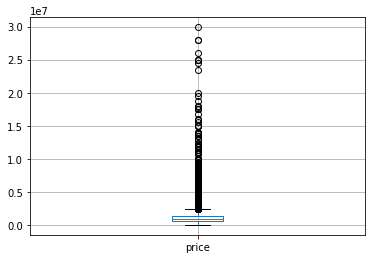

In [22]:
df.boxplot(column=['price'])

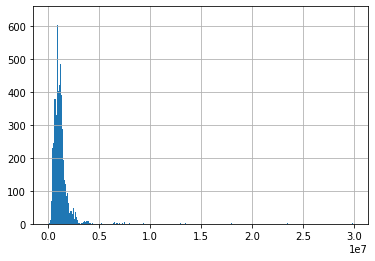

In [23]:
df['price'].hist(bins=1500)

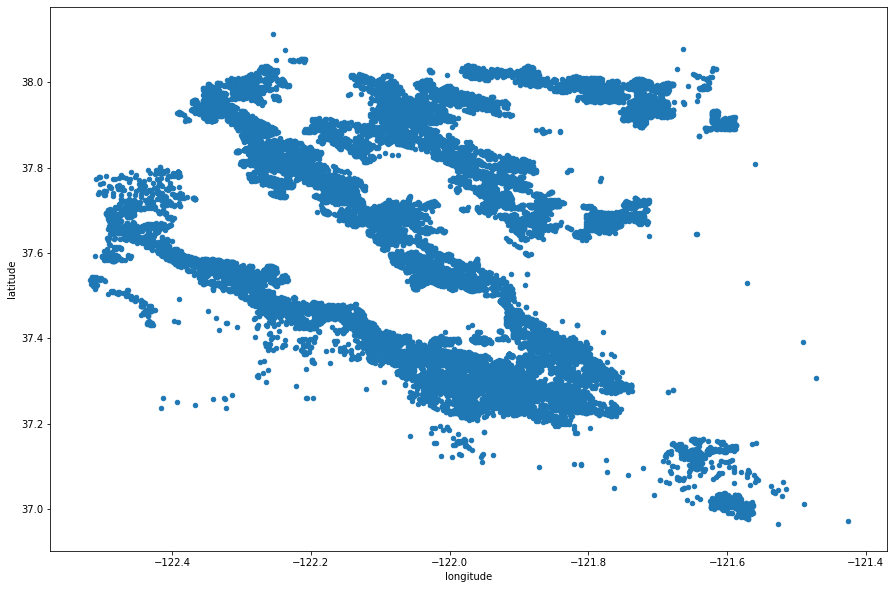

In [24]:
df.plot.scatter(x='longitude', y='latitude', figsize=(15,10))

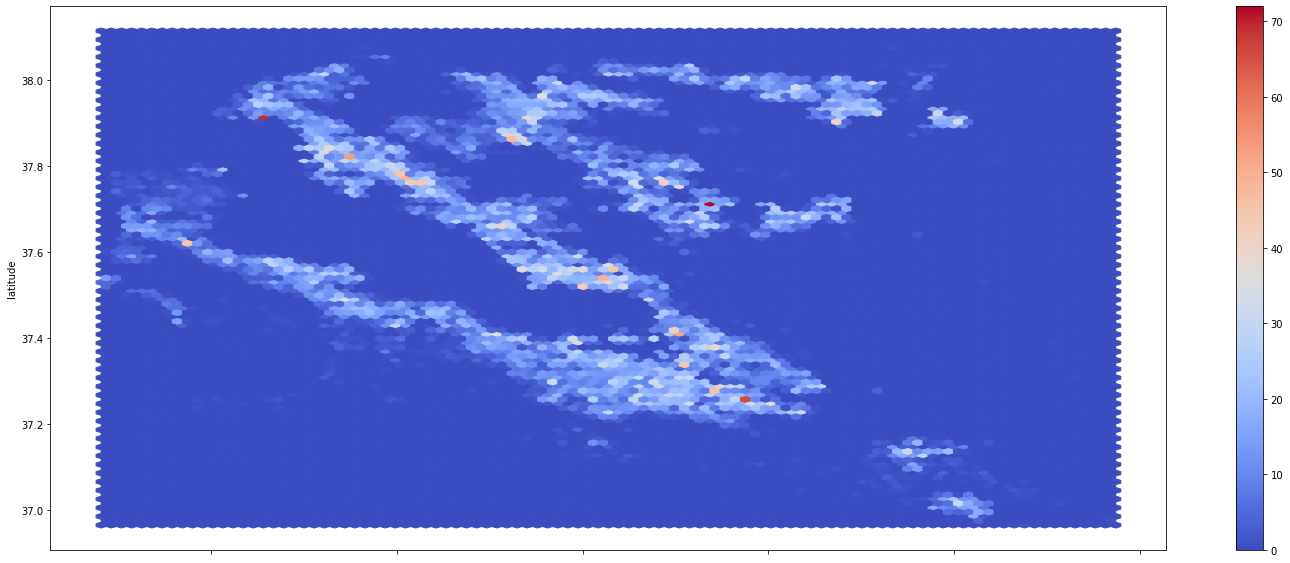

In [25]:
df.plot.hexbin(x='longitude', y='latitude', figsize=(25,10), cmap='coolwarm')

In [26]:
last_length = df.shape[0]

In [27]:
print('number of initial data = ', first_length)
print('number of data after cleaning null address and coordinates = ', length_01)
print('number of data after cleaning duplicated data = ', length_02)
print('number of data after cleaning outliers = ', length_03)
print('number of last data    = ', last_length)
print('percentage of deleted data =', ((first_length-last_length)/first_length)*100)

number of initial data =  27600
number of data after cleaning null address and coordinates =  27582
number of data after cleaning duplicated data =  27063
number of data after cleaning outliers =  26998
number of last data    =  26998
percentage of deleted data = 2.1811594202898554


In [28]:
#from sklearn.cluster import DBSCAN
#X, y =make_blobs(random_state = 0, n_samples=12)

In [29]:
import seaborn as sb
import scipy
from scipy.stats.stats import pearsonr

In [30]:
df.head(5)

,address,price,beds,baths,square_feet,year_built,latitude,longitude
0,1501 Canyonwood Ct,330000.0,2,1.0,1054,1967,37.857396,-122.069674
1,80 Lily CT,1688000.0,3,2.0,2310,2015,37.697279,-122.420136
2,919 39Th Ave,650000.0,3,2.0,1493,1905,37.771848,-122.221259
3,2075 Quesada AVE,680000.0,3,2.0,1737,1907,37.737195,-122.398787
4,600 Moore RD,10900000.0,4,4.0,6000,1998,37.457449,-122.227054


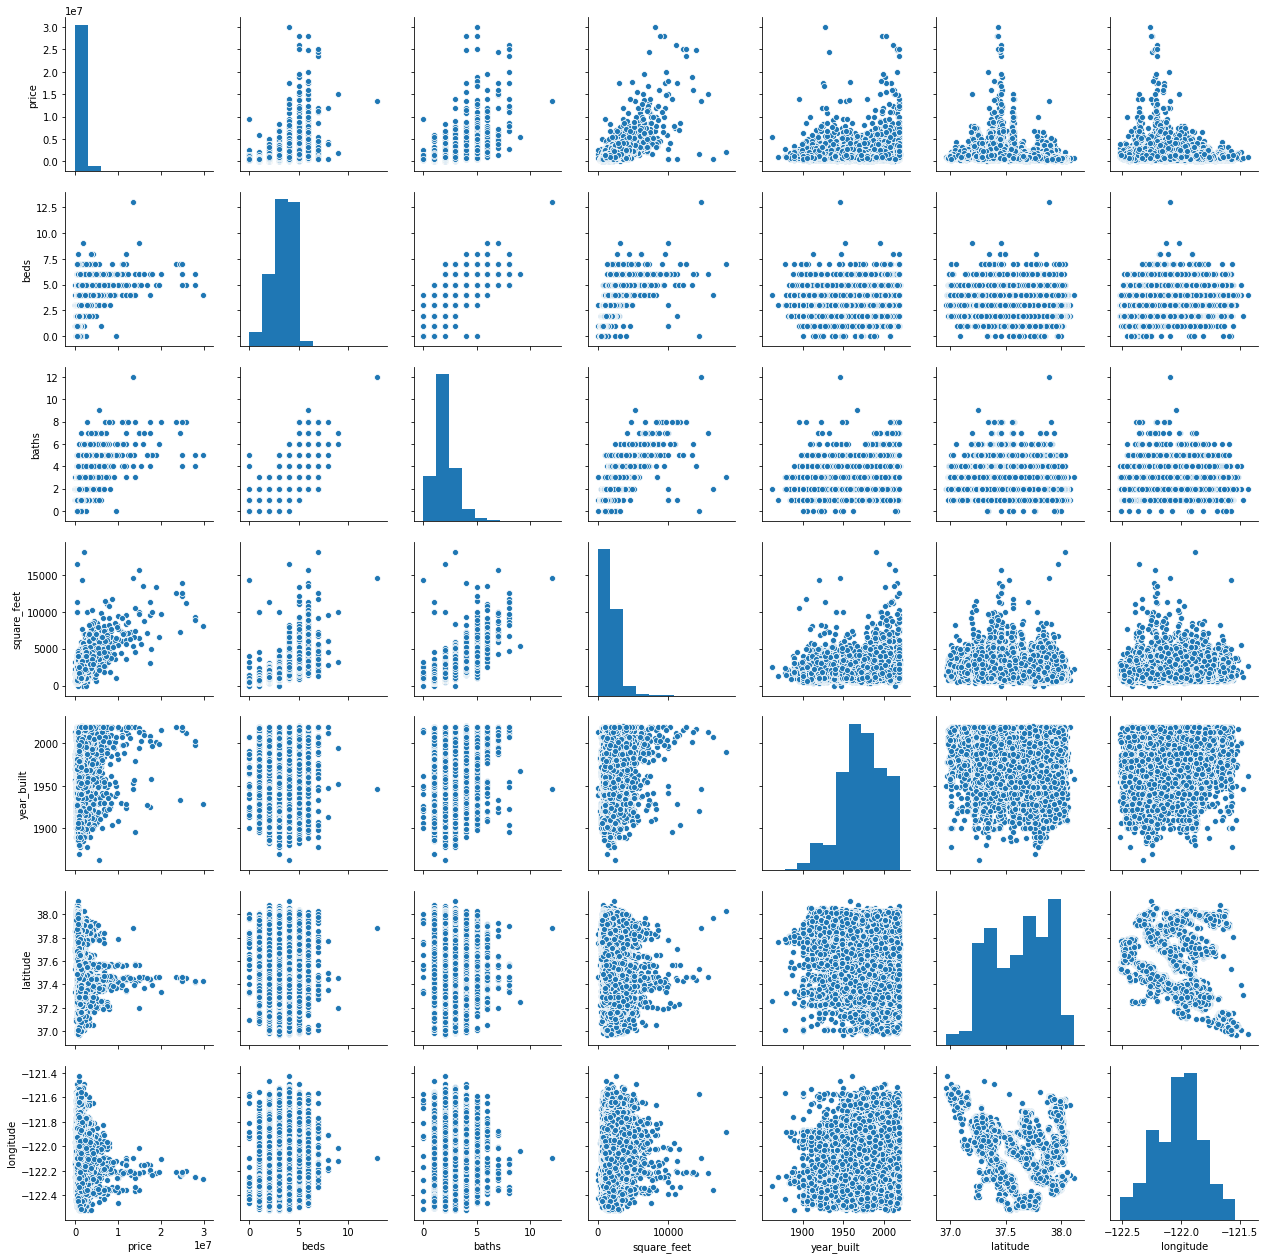

In [31]:
sb.pairplot(df)

In [32]:
pearsonr_coefficient, p_value = pearsonr(df['price'], df['beds'])
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.401


In [33]:
pearsonr_coefficient, p_value = pearsonr(df['price'], df['baths'])
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.511


In [34]:
pearsonr_coefficient, p_value = pearsonr(df['price'], df['square_feet'])
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.649


In [35]:
pearsonr_coefficient, p_value = pearsonr(df['price'], df['year_built'])
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.027


In [36]:
pearsonr_coefficient, p_value = pearsonr(df['baths'], df['beds'])
print ('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.695


In [37]:
# dbscan = DBSCAN()
# clusters = dbscan.fit_predict(X)

In [38]:
grouped = df.groupby('beds')
print (grouped['price'].agg(np.mean))

beds
0     7.263413e+05
1     5.452137e+05
2     7.521006e+05
3     1.028093e+06
4     1.393692e+06
5     1.971441e+06
6     3.298643e+06
7     4.788884e+06
8     4.722500e+06
9     8.399444e+06
13    1.350000e+07
Name: price, dtype: float64


In [39]:
#df.head(10)

In [40]:
# y = df['price']
# x = df.iloc[:,2:-2]
# # x = df.drop(columns=['address', 'price'])
# # x = df.drop(['address', 'price'], axis = 1)

#Feature Engineering
# Wealthness Index

In [41]:
# df.head(5)

In [42]:
# lat = df['latitude']
# long = df['longitude']
# pr = df['price']
# sf = df['square_feet']

In [43]:
# x = pd.concat([lat, long], axis=1)

In [44]:
# dev_ind = pr / sf

In [45]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors=21)
# knn.fit(x, dev_ind)


# Linear Regression Modeli

In [46]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [47]:
# df.head(3)

In [48]:
# dev_int = knn.predict(df.iloc[:,6:])
# x = df.iloc[:,2:6].assign(dev_int = dev_int)
# #x['dev_int'] = dev_int
# y = df.iloc[:,1]
# x.head(3)

In [49]:
# sc = StandardScaler()
# x_scaled = sc.fit_transform(x)

In [50]:
# model_1 = LinearRegression()
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25) 

# model_1.fit(x_train, y_train)

In [51]:
# model_1.score(x_train,y_train)

In [52]:
# model_1.score(x_test,y_test)

In [53]:
# y_pred = model_1.predict(x_test)

In [54]:
# plt.hist (y_pred - y_test)

In [55]:
# model_1.coef_

In [56]:
# x.columns

In [57]:
# import statsmodels.api as sm

In [58]:
# model_2 = sm.OLS(y_train, sm.add_constant(x_train))

In [59]:
# model_2 = model_2.fit()

In [60]:
# model_2.summary()

In [61]:
# plt.scatter(df['beds'], df['price'])

# Konuma Gore Cluster lama

In [62]:
# from sklearn.cluster import DBSCAN, KMeans, hierarchical

In [63]:
# df.head(5)

In [64]:
# x = df.iloc[:,2:]
# # x = df.drop(columns=['address', 'price'])
# # x = df.drop(['address', 'price'], axis = 1)

In [65]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [66]:
# sc = StandardScaler()
# x_scaled = sc.fit_transform(x)

In [67]:
# dbscan = DBSCAN()
# clusters = dbscan.fit_predict(x_scaled)

In [68]:
# clusters

In [69]:
# plt.scatter('longitude','latitude', data = x, c = clusters)

In [70]:
# set(clusters)

In [71]:
# clusters.reshape(-1, 1)

Integration of Clusters to the Dataset

In [72]:
# y = df['price']
# x = df.iloc[:,2:-2]
# # x = df.drop(columns=['address', 'price'])
# # x = df.drop(['address', 'price'], axis = 1)

In [73]:
# x['clusters'] = clusters

# KNN Model

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [75]:
df.head(5)

,address,price,beds,baths,square_feet,year_built,latitude,longitude
0,1501 Canyonwood Ct,330000.0,2,1.0,1054,1967,37.857396,-122.069674
1,80 Lily CT,1688000.0,3,2.0,2310,2015,37.697279,-122.420136
2,919 39Th Ave,650000.0,3,2.0,1493,1905,37.771848,-122.221259
3,2075 Quesada AVE,680000.0,3,2.0,1737,1907,37.737195,-122.398787
4,600 Moore RD,10900000.0,4,4.0,6000,1998,37.457449,-122.227054


In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [77]:
feature_selector = RFE(estimator=RandomForestRegressor(n_estimators=10))

In [78]:
x = df.iloc[:,2:] 
y = df['price']

In [79]:
feature_selector.fit(x, y)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=10, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [80]:
feature_selector.get_support()

array([False, False,  True, False,  True,  True])

In [81]:
#feature_selector.transform(x)

In [82]:
x = x[x.columns[feature_selector.get_support()]]

In [83]:
# sc = StandardScaler()
sc = MinMaxScaler()
# sc = MaxAbsScaler()
# sc = Normalizer()
# sc = RobustScaler()
x_scaled = sc.fit_transform(x)

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = {'n_neighbors':range(1,100)})

In [86]:
grid.fit(x,y)

C:\Users\songt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
grid.best_params_

{'n_neighbors': 21}

In [88]:
model_knn = KNeighborsRegressor(n_neighbors=21)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 200) 

model_knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                    weights='uniform')

In [ ]:
model_knn.score(x_train,y_train)

In [ ]:
model_knn.score(x_test,y_test)

In [ ]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap='jet')

In [ ]:
x1 = df.sample(1000)
y1 = x1.price

In [ ]:
x1 = x1[['square_feet', 'latitude', 'longitude']]

In [ ]:
x1 = sc.transform(x1)

In [ ]:
y_pred = model_knn.predict(x1)

In [ ]:
plt.hist(y1-y_pred)

In [ ]:
(y1-y_pred).round(0)

In [ ]:
error_ind = np.abs(y1-y_pred).sort_values().tail(20).index
np.abs(y1-y_pred).sort_values().tail(20)

In [ ]:
df.loc[error_ind]

In [ ]:
x.head()

In [ ]:
x1

In [ ]:
err = (y1-y_pred)
plt.scatter(x1[:,0], err)

In [ ]:
plt.scatter(y1, (y1-y_pred))